In [1]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.util.constants import DATA_PATH

In [10]:
df_all = pl.read_parquet(DATA_PATH / 'df_all.parquet')

In [16]:
number_of_windows = 20

window_size = len(df_all['date_id'].unique()) / number_of_windows

In [29]:
result = []

for i in range(number_of_windows):
    result_window = []
    start_date = df_all['date_id'].unique()[round(i * window_size)]
    end_date = df_all['date_id'].unique()[round((i + 1) * window_size)-1]
    df_subset = df_all.filter(
        pl.col('date_id').is_between(start_date, end_date, closed='left')
    )
    
    for j in range(79):
        feature_name = f'feature_{j:02}'
        
        df_feature = df_subset.select(['responder_6', feature_name]).filter(pl.col(feature_name).is_not_null())
        
        if len(df_feature) == 0:
            result_window.append(np.nan)
            continue
        
        if df_feature[feature_name].dtype == pl.Int8 or df_feature[feature_name].dtype == pl.Int16:
            df_feature = df_feature.with_columns(df_feature[feature_name].cast(pl.Float32))
        
        pearson_corr = np.corrcoef(df_feature[feature_name].to_numpy(), df_feature['responder_6'].to_numpy())[0, 1]
        
        result_window.append(pearson_corr)
    
    result.append(result_window)
    print(f'window {i} done')

window 0 done
window 1 done
window 2 done
window 3 done
window 4 done
window 5 done
window 6 done
window 7 done
window 8 done
window 9 done
window 10 done
window 11 done
window 12 done
window 13 done
window 14 done
window 15 done
window 16 done
window 17 done
window 18 done
window 19 done


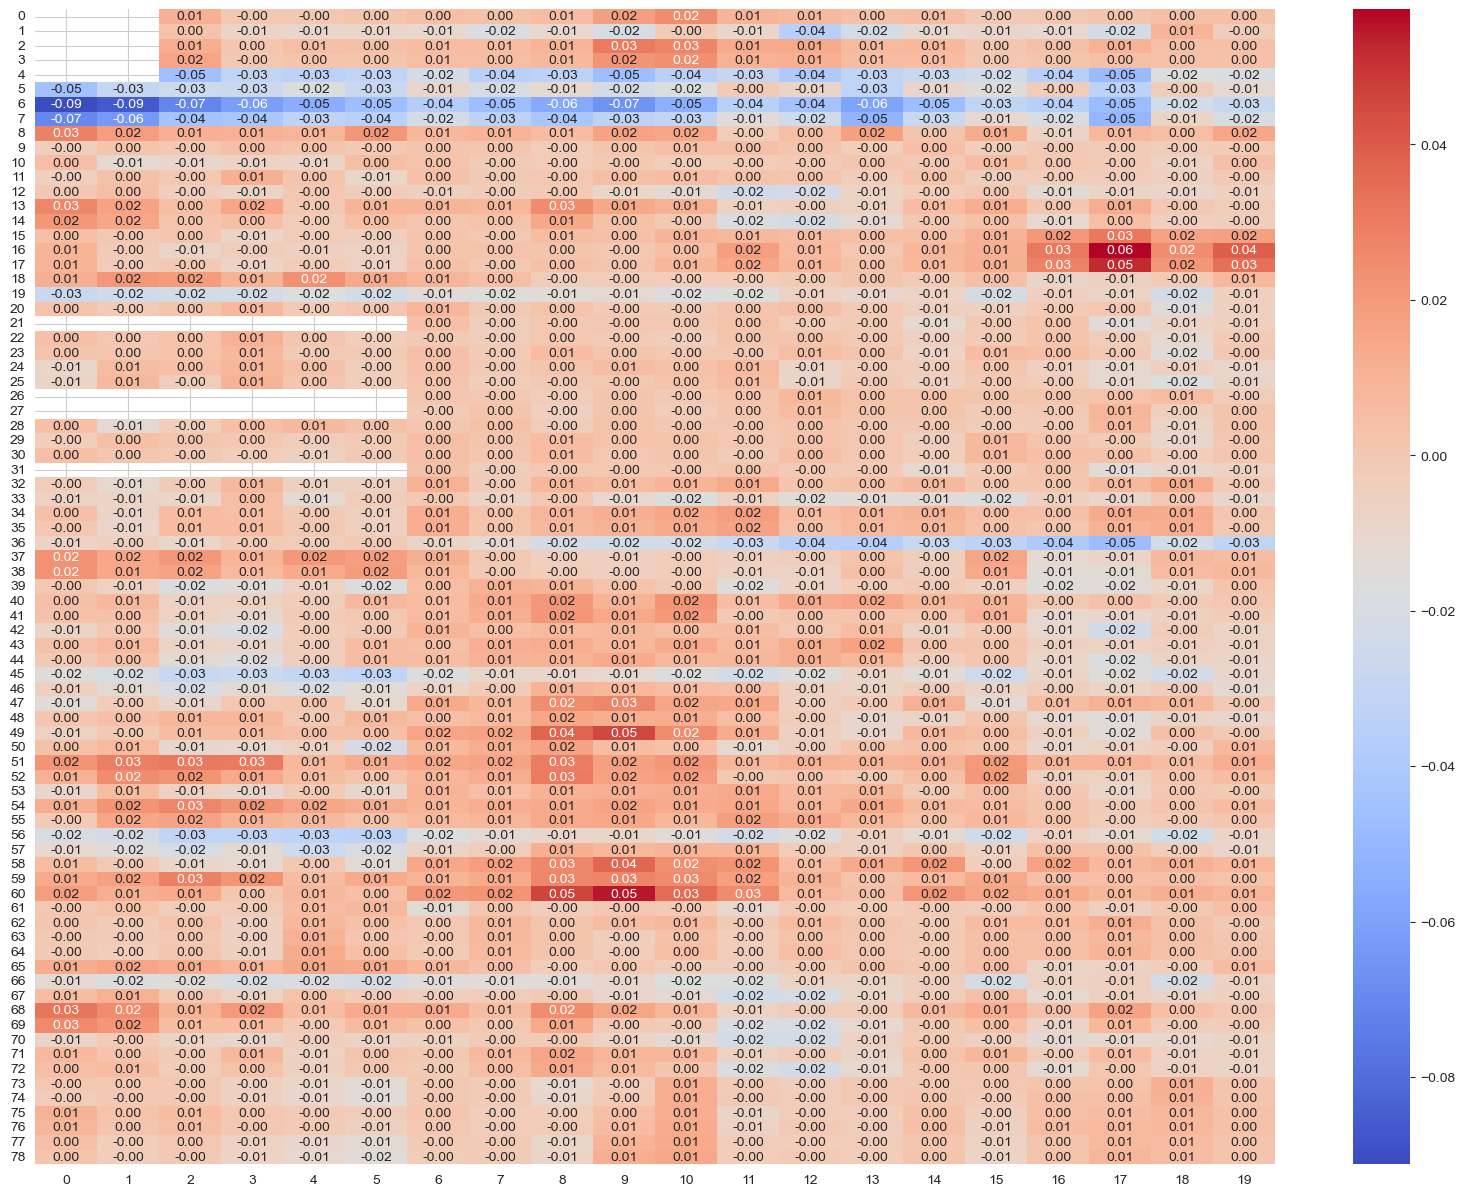

In [30]:
df_corr = pl.DataFrame(result, [str(i) for i in range(20)], orient='col')

# show the values in the heatmap, rounded to two decimals
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.to_numpy(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

No feature shows a clearly deteriorating trend. I'll keep them all.